In [1]:
import proveit.specialStatementMagic # for %begin_axioms and %end_axioms
from proveit.expression import Operation
from proveit.basiclogic import Forall, Equals, In, Implies, Iff, And
from proveit.linalg import ScalarProd, TensorProd, TensorExp
from proveit.physics.quantum import Bra, Ket, RegisterBra, RegisterKet, Meas, Circuit, Input, Output, Gate, MultiWire
from proveit.physics.quantum.common import I, H, Hgate, CTRL_DN, WIRE_DN, WIRE_LINK, PASS, \
    QubitSpace, QubitRegisterSpace, RegisterSU, ket0, ket1, ketPlus, invRoot2
from proveit.common import a, b, c, d, f, k, l, m, n, u, x, y, z, N, U, X, alpha, Psi, xEtc
from proveit.number.common import zero, one, two
from proveit.number.numberSets import NaturalsPos, Complexes
from proveit.number import Fraction, Exponentiate, Sqrt, Add, Subtract, Abs, DiscreteContiguousSet, Summation, Sqrt,\
    Multiply
from proveit.statistics import Prob
from proveit.linalg import ScalarProd, MatrixProd, SU

In [2]:
def controlledNgate(a, b, x, y):
    return Circuit([[Input(a), PASS, CTRL_DN, Output(b)],
                    [Input(x), MultiWire(n), Gate(U), Output(y)]])

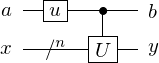

In [3]:
pregatedControlledNgate = Circuit([[Input(a), Gate(u), CTRL_DN, Output(b)],
                                   [Input(x), MultiWire(n), Gate(U), Output(y)]])
pregatedControlledNgate

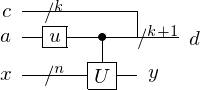

In [4]:
pregatedControlledNgateWithMerge = Circuit([[Input(c), MultiWire(k), PASS, WIRE_DN, PASS, PASS],
                                            [Input(a), Gate(u), CTRL_DN, WIRE_LINK, MultiWire(Add(k, one)), Output(d)],
                                            [Input(x), MultiWire(n), Gate(U), Output(y), PASS, PASS]])
pregatedControlledNgateWithMerge

In [5]:
%begin_theorems

In [6]:
unitaryHadamard = In(H, SU(two))
unitaryHadamard

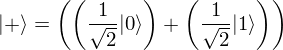

In [7]:
ketPlusDistributed = Equals(ketPlus, Add(ScalarProd(invRoot2, ket0), ScalarProd(invRoot2, ket1)))
ketPlusDistributed

In [8]:
scaledQubitStateInQubitSpace = Forall(x, Forall(alpha, In(ScalarProd(alpha, x), QubitSpace),
                                               domain=Complexes),
                                      domain=QubitSpace)
scaledQubitStateInQubitSpace

In [9]:
transformedQubitStateInQubitSpace = Forall(x, Forall(U, In(MatrixProd(U, x), QubitSpace),
                                                     domain=SU(two)),
                                           domain=QubitSpace)
transformedQubitStateInQubitSpace

In [10]:
summedQubitStateInQubitSpace = Forall(xEtc, In(Add(xEtc), QubitSpace), domain=QubitSpace)
summedQubitStateInQubitSpace

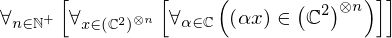

In [11]:
scaledQubitRegisterStateInQubitRegisterSpace = Forall(n,
                                                      Forall(x, 
                                                             Forall(alpha, 
                                                                    In(ScalarProd(alpha, x), QubitRegisterSpace(n)),
                                                                    domain=Complexes),
                                                             domain=QubitRegisterSpace(n)),
                                                      domain=NaturalsPos)
scaledQubitRegisterStateInQubitRegisterSpace

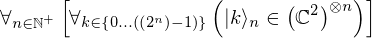

In [12]:
registerKetInQubitRegisterSpace = Forall(n, Forall(k, In(RegisterKet(k, n), QubitRegisterSpace(n)),
                                                   domain = DiscreteContiguousSet(zero, Subtract(Exponentiate(two, n), one))),
                                         domain=NaturalsPos)
registerKetInQubitRegisterSpace                               

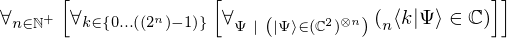

In [13]:
registerQubitComplexAmplitude = Forall(n, Forall(k, Forall(Psi,
                                                           In(MatrixProd(RegisterBra(k, n), 
                                                                         Ket(Psi)),
                                                             Complexes),
                                                          conditions = [In(Ket(Psi), QubitRegisterSpace(n))]),
                                                 domain=DiscreteContiguousSet(zero, Subtract(Exponentiate(two, n),
                                                                                             one))),
                                       domain=NaturalsPos)
registerQubitComplexAmplitude

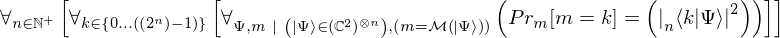

In [14]:
registerQubitBornRule = Forall(n, Forall(k, Forall((Psi, m), 
                                                   Equals(Prob(Equals(m, k), m), 
                                                          Exponentiate(Abs(MatrixProd(RegisterBra(k, n), 
                                                                                      Ket(Psi))),
                                                                      two)),
                                                   conditions = [In(Ket(Psi), QubitRegisterSpace(n)),
                                                                 Equals(m, Meas(Ket(Psi)))]),
                                         domain=DiscreteContiguousSet(zero, Subtract(Exponentiate(two, n), one))),
                               domain=NaturalsPos)
registerQubitBornRule                                     

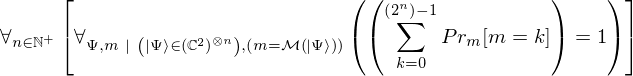

In [15]:
registerQubitAllProbs = Forall(n, Forall((Psi, m), 
                                         Equals(Summation(k, Prob(Equals(m, k), m), 
                                                          domain=DiscreteContiguousSet(zero, 
                                                                                       Subtract(Exponentiate(two, n), 
                                                                                                one))),
                                                one),
                                         conditions = [In(Ket(Psi), QubitRegisterSpace(n)),
                                                       Equals(m, Meas(Ket(Psi)))]),
                               domain=NaturalsPos)
registerQubitAllProbs

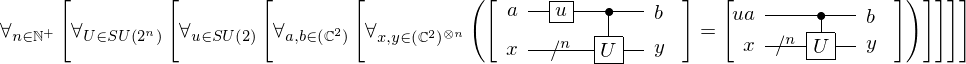

In [16]:
pregatedControlledNgateEquiv = Forall(n, 
                                     Forall(U, 
                                            Forall(u,
                                                   Forall((a, b),
                                                          Forall((x, y),
                                                                 Equals(pregatedControlledNgate,
                                                                        controlledNgate(MatrixProd(u, a), b, x, y)),
                                                                 domain=QubitRegisterSpace(n)),
                                                          domain=QubitSpace),
                                                   domain=SU(two)),
                                            domain=RegisterSU(n)), 
                                        domain=NaturalsPos)
pregatedControlledNgateEquiv

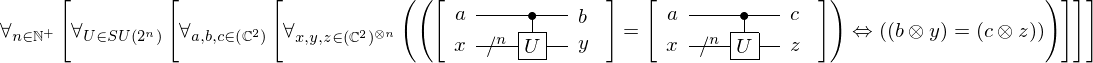

In [17]:
controlledNgateEquiv = Forall(n, 
                             Forall(U, 
                                    Forall((a, b, c),
                                           Forall((x, y, z),
                                                  Iff(Equals(controlledNgate(a, b, x, y),
                                                             controlledNgate(a, c, x, z)),
                                                      Equals(TensorProd(b, y), TensorProd(c, z))),
                                                  domain=QubitRegisterSpace(n)),
                                           domain=QubitSpace),
                                    domain=RegisterSU(n)), 
                             domain=NaturalsPos)
controlledNgateEquiv

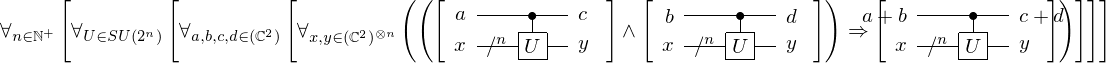

In [18]:
superpositionControlledNgate = Forall(n, 
                             Forall(U, 
                                    Forall((a, b, c, d),
                                           Forall((x, y),
                                                  Implies(And(controlledNgate(a, c, x, y),
                                                              controlledNgate(b, d, x, y)),
                                                          controlledNgate(Add(a, b), Add(c, d), x, y)),
                                                  domain=QubitRegisterSpace(n)),
                                           domain=QubitSpace),
                                    domain=RegisterSU(n)), 
                             domain=NaturalsPos)
superpositionControlledNgate

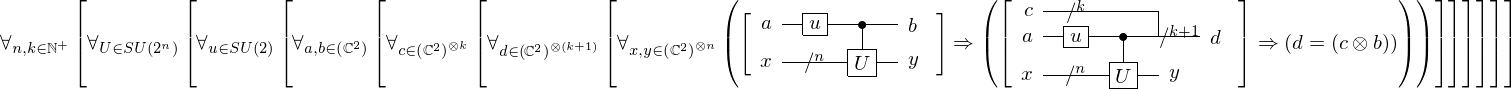

In [19]:
pregatedControlledNgateMerger = Forall((n, k), 
                                       Forall(U, 
                                              Forall(u,
                                                     Forall((a, b),
                                                            Forall(c,
                                                                   Forall(d,
                                                                          Forall((x, y),
                                                                                 Implies(pregatedControlledNgate,
                                                                                         Implies(pregatedControlledNgateWithMerge,
                                                                                                 Equals(d, TensorProd(c, b)))),
                                                                                 domain=QubitRegisterSpace(n)),
                                                                          domain=QubitRegisterSpace(Add(k, one))),
                                                                   domain=QubitRegisterSpace(k)),
                                                          domain=QubitSpace),
                                                   domain=SU(two)),
                                            domain=RegisterSU(n)), 
                                        domain=NaturalsPos)
pregatedControlledNgateMerger


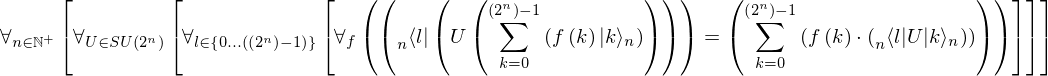

In [20]:
registerBraOverSummedKet = Forall(n,
                                  Forall(U, 
                                      Forall(l,
                                        Forall(f, 
                                             Equals(MatrixProd(RegisterBra(l, n), 
                                                               MatrixProd(U, 
                                                                          Summation(k, ScalarProd(Operation(f, k), RegisterKet(k, n)),
                                                                                    domain=DiscreteContiguousSet(zero, Subtract(Exponentiate(two, n), one))))),
                                                    Summation(k, Multiply(Operation(f, k), 
                                                                            MatrixProd(RegisterBra(l, n), U, RegisterKet(k, n))),
                                                             domain=DiscreteContiguousSet(zero, Subtract(Exponentiate(two, n), one))))),
                                            domain=DiscreteContiguousSet(zero, Subtract(Exponentiate(two, n), one))),
                                         domain=SU(Exponentiate(two, n))),
                                  domain=NaturalsPos)
registerBraOverSummedKet

In [21]:
%end_theorems

Creating theorems *.dill and *.pv_it files in the __pv_it__ directory
These theorems may be imported from proveit.physics.quantum.theorems
